<a href="https://www.kaggle.com/code/djghajhg/sampling-from-fashion-mnist?scriptVersionId=209995740" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print()

for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte

/kaggle/working/__notebook__.ipynb


In [2]:
# Function to convert grayscale image to RGB with grayscale values in all channels
def grayscale_to_rgb_flattened(flattened_image):
    # Normalize the image to range [0, 1]
    normalized_image = flattened_image / 255.0
    # Create an empty array for the RGB image
    rgb_image_flattened = np.zeros((flattened_image.size * 3,), dtype=np.uint8)
    # Assign the grayscale values to each RGB channel
    rgb_image_flattened[0::3] = (normalized_image * 255).astype(np.uint8)
    rgb_image_flattened[1::3] = (normalized_image * 255).astype(np.uint8)
    rgb_image_flattened[2::3] = (normalized_image * 255).astype(np.uint8)
    return rgb_image_flattened


# Function to convert grayscale image to randomly colored RGB
def grayscale_to_random_rgb_flattened(flattened_image):
    # Normalize the image to range [0, 1]
    normalized_image = flattened_image / 255.0
    # Create an empty array for the RGB image
    rgb_image_flattened = np.zeros((flattened_image.size * 3,), dtype=np.uint8)
    # Randomly choose a color channel to apply the grayscale values
    color_channel = np.random.choice([0, 1, 2])
    # Assign the grayscale values to the selected RGB channel
    rgb_image_flattened[color_channel::3] = (normalized_image * 255).astype(np.uint8)
    return rgb_image_flattened
    
def grayscale_to_one_rgb_flattened(flattened_image):
    # Normalize the image to range [0, 1]
    normalized_image = flattened_image / 255.0
    # Create an empty array for the RGB image
    rgb_image_flattened = np.zeros((flattened_image.size * 3,), dtype=np.uint8)
    # choose a color channel to apply the grayscale values
    color_channel = 1
    # Assign the grayscale values to the selected RGB channel
    rgb_image_flattened[color_channel::3] = (normalized_image * 255).astype(np.uint8)
    
    return rgb_image_flattened

In [3]:
# Define the number of rows and columns
def viz_dataset(dataset, channel):
    num_rows = 3
    num_cols = 5
    
    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))
    
    # Loop through the desired number of images
    for i in range(num_rows * num_cols):
        # Extract the image and label from the training data
        image_data = dataset.iloc[i, 1:].values
        image_label = dataset.iloc[i, 0]
        
        # Reshape the flattened image data back to 28x28x3
        image_rgb = image_data.reshape(28, 28, channel)
        
        # Display the image in the corresponding subplot
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(image_rgb)
        ax.set_title(f"Label: {image_label}")
        ax.axis('off')  # Hide the axis
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

### Random Color Sampling of Training Data

In [4]:
# Load CSV files
train_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

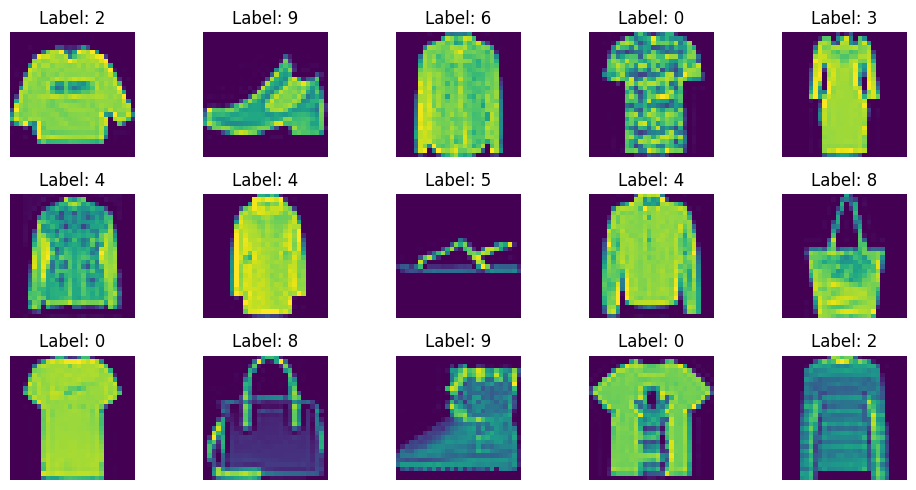

In [5]:
viz_dataset(train_data, 1)

In [6]:

# Convert train images to RGB in the flattened data
train_images_flattened = train_data.iloc[:, 1:].values
train_images_rgb_flattened = np.array([grayscale_to_random_rgb_flattened(image) for image in train_images_flattened])

# Convert test images to RGB in the flattened data
test_images_flattened = test_data.iloc[:, 1:].values
test_images_rgb_flattened = np.array([grayscale_to_rgb_flattened(image) for image in test_images_flattened])

# Create new DataFrames
train_data_rgb = pd.DataFrame(train_images_rgb_flattened)
test_data_rgb = pd.DataFrame(test_images_rgb_flattened)

# Add the labels back to the DataFrames
train_data_rgb.insert(0, 'label', train_data.iloc[:, 0])
test_data_rgb.insert(0, 'label', test_data.iloc[:, 0])

# Save the new datasets to CSV files in the working directory
train_data_rgb.to_csv('/kaggle/working/fashion-mnist_train_rgb.csv', index=False)
test_data_rgb.to_csv('/kaggle/working/fashion-mnist_test_rgb.csv', index=False)

In [7]:
fashine_mnist_test_rgb_training = pd.read_csv('/kaggle/working/fashion-mnist_train_rgb.csv')
fashine_mnist_test_rgb_test = pd.read_csv('/kaggle/working/fashion-mnist_test_rgb.csv')


### Random Color Sampling for Randomly Select Classes (2, 4, 6, 8, 10)



In [8]:
unique_classes = fashine_mnist_test_rgb_training.iloc[:, 0].unique()

train_data_np = train_data.values
train_data_np.shape

num_samples = train_data_np.shape[0]
num_features = train_data_np.shape[1] - 1

#### 2 Classes

In [9]:
selected_classes = random.sample(list(unique_classes), 2)

In [10]:

processed_data_array = np.zeros((num_samples, num_features * 3))  # 1 for label, 3 for RGB channels

for idx in range(train_data_np.shape[0]):
    grayscale_image = train_data_np[idx, 1:]
    if train_data_np[idx, 0] in selected_classes:
        rgb_image = grayscale_to_random_rgb_flattened(grayscale_image)
    else:
        rgb_image = grayscale_to_rgb_flattened(grayscale_image)
    
    # Update the processed data array with the processed image
    processed_data_array[idx, :] = rgb_image

train_data_random_2_class_rgb = pd.DataFrame(processed_data_array)
train_data_random_2_class_rgb.insert(0,'label',train_data.iloc[:, 0])

train_data_random_2_class_rgb.to_csv('/kaggle/working/fashion-mnist_train_rgb.csv', index=False)


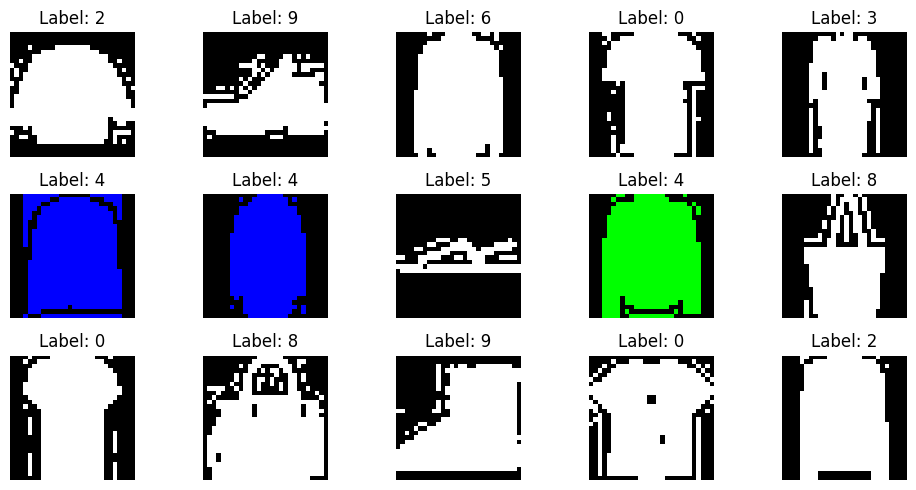

In [11]:
viz_dataset(train_data_random_2_class_rgb, 3)

#### 4 Classes

In [12]:
selected_classes = random.sample(list(unique_classes), 4)

In [13]:

processed_data_array = np.zeros((num_samples, num_features * 3)) 

for idx in range(train_data_np.shape[0]):
    grayscale_image = train_data_np[idx, 1:]
    if train_data_np[idx, 0] in selected_classes:
        rgb_image = grayscale_to_random_rgb_flattened(grayscale_image)
    else:
        rgb_image = grayscale_to_rgb_flattened(grayscale_image)
    
    # Update the processed data array with the processed image
    processed_data_array[idx, :] = rgb_image

train_data_random_4_class_rgb = pd.DataFrame(processed_data_array)
train_data_random_4_class_rgb.insert(0,'label',train_data.iloc[:, 0])

train_data_random_4_class_rgb.to_csv('/kaggle/working/train_data_random_4_class_rgb.csv', index=False)

#### 6 Classes

In [14]:
selected_classes = random.sample(list(unique_classes), 6)

In [15]:

processed_data_array = np.zeros((num_samples, num_features * 3)) 

for idx in range(train_data_np.shape[0]):
    grayscale_image = train_data_np[idx, 1:]
    if train_data_np[idx, 0] in selected_classes:
        rgb_image = grayscale_to_random_rgb_flattened(grayscale_image)
    else:
        rgb_image = grayscale_to_rgb_flattened(grayscale_image)
    
    # Update the processed data array with the processed image
    processed_data_array[idx, :] = rgb_image

train_data_random_6_class_rgb = pd.DataFrame(processed_data_array)
train_data_random_6_class_rgb.insert(0,'label',train_data.iloc[:, 0])

train_data_random_6_class_rgb.to_csv('/kaggle/working/train_data_random_6_class_rgb.csv', index=False)

#### 8 Classes

In [16]:
selected_classes = random.sample(list(unique_classes), 8)

In [17]:

processed_data_array = np.zeros((num_samples, num_features * 3)) 

for idx in range(train_data_np.shape[0]):
    grayscale_image = train_data_np[idx, 1:]
    if train_data_np[idx, 0] in selected_classes:
        rgb_image = grayscale_to_random_rgb_flattened(grayscale_image)
    else:
        rgb_image = grayscale_to_rgb_flattened(grayscale_image)
    
    # Update the processed data array with the processed image
    processed_data_array[idx, :] = rgb_image

train_data_random_8_class_rgb = pd.DataFrame(processed_data_array)
train_data_random_8_class_rgb.insert(0,'label',train_data.iloc[:, 0])

train_data_random_8_class_rgb.to_csv('/kaggle/working/train_data_random_8_class_rgb.csv', index=False)

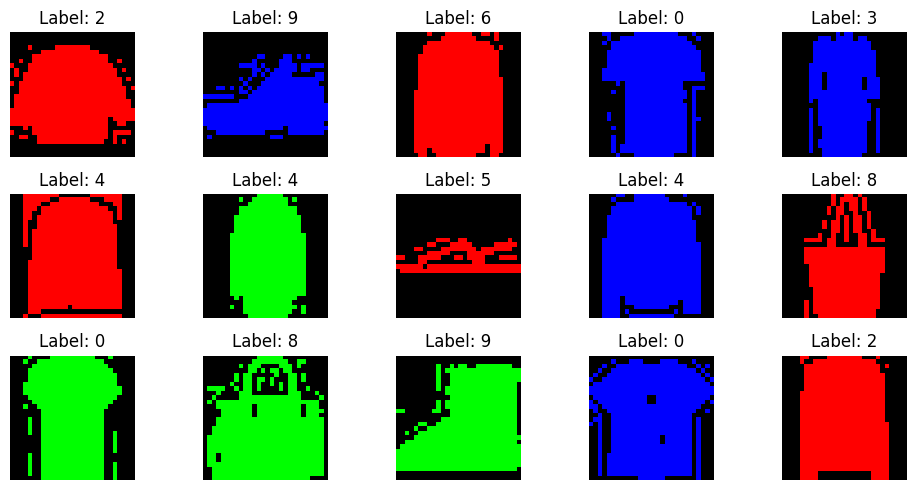

In [18]:
viz_dataset(train_data_random_8_class_rgb, 3)

### Randomly Assigning One Color to a Specific Class

In [19]:
selected_class = random.sample(list(unique_classes), 1)

In [20]:

processed_data_array = np.zeros((num_samples, num_features * 3)) 

for idx in range(train_data_np.shape[0]):
    grayscale_image = train_data_np[idx, 1:]
    if train_data_np[idx, 0] in selected_class:
        rgb_image = grayscale_to_one_rgb_flattened(grayscale_image)
    else:
        rgb_image = grayscale_to_rgb_flattened(grayscale_image)
    
    # Update the processed data array with the processed image
    processed_data_array[idx, :] = rgb_image

train_data_random_1_class_rgb = pd.DataFrame(processed_data_array)
train_data_random_1_class_rgb.insert(0,'label',train_data.iloc[:, 0])

train_data_random_1_class_rgb.to_csv('/kaggle/working/train_data_random_1_class_rgb.csv', index=False)

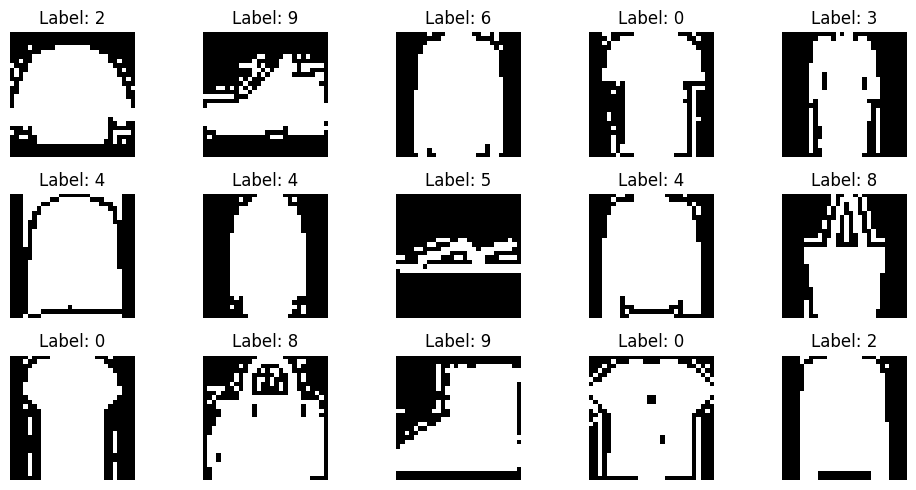

In [21]:
viz_dataset(train_data_random_1_class_rgb, 3)